 - Group Number: 31
 - Member #1: Yashwin Sudarshan (s3781718) 

# **<font color=blue>Predicting the Revenue of a Movie</font>**

## <font color=blue>Introduction</font>

The aim of this analytics project is to predict the earnings of a movie, utilising movie data contained in the MovieLens dataset. This dataset is obtained from Kaggle.com at https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7 (Banik, 2017).

## <font color=blue>Contents</font>

 - [Overview](#Overview)
<a href='#Overview'></a> 
: Provides a description of the MovieLens dataset to be utilised, and its features.
 - [Data Preparation](#DataPreparation)
<a href='#DataPreparation'></a>
: Portrays data cleansing and preparation steps.
 - [Data Exploration](#DataExploration)
<a href='#DataExploration'></a>
: Provides exploration of the dataset variables and relationships.
 - [Statistical Modelling and Peformance Evaluation](#StatisticalModellingandPerformanceEvaluation)
<a href='#StatisticalModellingandPeformanceEvaluation'></a>
: A full regression model is created, and a backwards variable selection process is executed to fit a reduced regression model. Diagnostic checks of each model are performed.
 - [Conclusion](#Conclusion)
<a href='#Conclusion'></a>
: Presents the findings of the report

<a id='Overview'></a>

 ## <font color=blue>Overview</font>

 ### <font color=blue>Data Source</font>

The MovieLens data from Kaggle.com contains seven different datasets, however, only the `movies_metadata` dataset is useful for this project. The `movies_metadata` dataset contains information about the features; it has 45467 records, and contains 23 independent features and 1 target feature.

### <font color=blue>Project Objective</font>

The ultimate objective of this analytics project is to estimate how much a certain movie will earn worldwide, based on various features associated with the movie.

### <font color=blue>Target Feature</font>

The target feature is a continuous numerical variable called `revenue`. 

### <font color=blue>Descriptive Features</font>

The variable descriptions for the `movies_metadata` dataset are listed below:

 - `adult`: TRUE, FALSE (True if the movie is strictly adult-rated or x-rated).
 - `belongs_to_collection`: Provides a name and id for a movie if it has sequels, prequels, or remakes.
 - `budget`: Continuous (Provides the money spent in making the movie).
 - `genres`: Provides different classifications of genres for each movie.
 - `homepage`: Provides a URL address to a website featuring the movie.
 - `id`: Provides a unique id number to indentify each movie in the database.
 - `imdb_id`: Provides a unique id number to identify each movie in the IMDB database.
 - `original_language`: Provides the language in which the movie was originally filmed.
 - `original_title`: Provides the original name of the movie.
 - `overview`: Provides a small summary of the plot of the movie.
 - `popularity`: Continuous (Provides numbers on a scale to assess the popularity of the movie).
 - `poster_path`: Provides a URL path to a visual promotional poster of the movie.
 - `production_companies`: Provides names of the production companies involved in making the movie.
 - `production_countries`: Provides names of the countries in which the movie was filmed.
 - `release_date`: Provides the global release date for the movie.
 - `revenue`: Continuous (Provides the worldwide total gross earnings of the movie).
 - `runtime`: Continuous (Provides the length of the movie in minutes).
 - `spoken_languages`: Provides the main languages that were spoken by characters in the film.
 - `status`: Released (this is the only value given as the database contains movies that were made on or prior to July 2017).
 - `tagline`: Provides an one-line statement about the movie to grab someone's interest in the movie.
 - `title`: Provides the current title of the movie (current in July 2017).
 - `video`: TRUE, FALSE (True if the movie is available in DVD format).
 - `vote_average`: Continuous (provides the overall average rating for the movie).
 - `vote_count`: Continous (Provides how many critics and MovieLens users rated the movie).
 
No information about the scale on which the `popularity` attribute in the dataset is measured, could be found. This variable will therefore be later excluded from analysis.  

<a id='DataPreparation'></a>

## <font color=blue>Data Preparation</font>

### <font color=blue>Preliminaries</font>

Firstly, the relevant python modules to be used in the analysis are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import warnings

%matplotlib inline
%config InLineBackend.figure_format = 'retina'
plt.style.use("ggplot")

warnings.filterwarnings('ignore')

The `movies_metadata` dataset is downloaded directly from Kaggle.com, and is read in.

In [2]:
movieData = pd.read_csv('movies_metadata.csv')
movieData.sample(5, random_state = 999)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
29001,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,233438,tt0059171,en,The Fat Spy,"A mostly-deserted island, which is believed to...",...,1966-05-11,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's a killer... a Diller... a blast of laffs!,The Fat Spy,False,2.5,4.0
16052,False,"{'id': 11118, 'name': 'The Olsen Gang Collecti...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",NaN,11391,tt0073482,da,Olsen-banden på sporet,Egon and his two cronies managed to sneak a fo...,...,1975-09-26,0.0,100.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,NaN,The Olsen Gang on the Track,False,7.3,14.0
7394,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,95514,tt0109324,en,Boy Meets Girl,A woman picks a man up in a bar and takes him ...,...,1994-07-30,0.0,93.0,[],Released,Too controversial to release,Boy Meets Girl,False,3.9,4.0
1480,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,17770,tt0120373,en,Trial and Error,An actor poses as a lawyer to help his sick fr...,...,1997-05-30,0.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Trial and Error,False,5.3,17.0
42226,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,100770,tt0057890,en,The Black Torment,"A lord returns to his manor with his new wife,...",...,1964-10-19,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Creature From the Grave Bears Witness to Murder,The Black Torment,False,5.8,2.0


### <font color=blue>Data Cleaning and Transformation</font>

We need confirmation as to whether the variable types in the dataset match the descriptions of the variables.

In [3]:
print(f"\nThe shape of the MovieLens dataset is {movieData.shape} \n")
print(f"Data types are found below: ")
print(movieData.dtypes)


The shape of the MovieLens dataset is (45466, 24) 

Data types are found below: 
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


It can be seen that the `budget` and `popularity` variables are objects, although they should be numerical features. So, we will convert these 2 entire columns to continuous variables.

In [4]:
movieData['budget'] = movieData['budget'].convert_objects(convert_numeric=True)
movieData['popularity'] = movieData['popularity'].convert_objects(convert_numeric=True)

### <font color=blue>Checking for Absent Values</font>

In [5]:
print(f"\nQuantity of absent values for each variable: ")
print(movieData.isnull().sum())


Quantity of absent values for each variable: 
adult                        0
belongs_to_collection    40972
budget                       3
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   6
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


There seems to be a large number of missing values in some of the features in the dataset. The large numbers of missing values in the `belongs_to_collection` and `homepage` variables can be explained by the fact that a lot of movies do not have sequels, or prequels, also, many movies do not have a dedicated website featuring the movies themselves. It is unsure why there are a large number of absent values in the `tagline` variable though. Managing missing values will be done later in the report.

### <font color=blue>Summary Statistics</font>

In [6]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of Continuous Features</b>'))
movieData.describe(include='float64')

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [7]:
display(HTML('<b>Table 2: Summary of Categorical Features</b>'))
movieData.describe(include='object')

,adult,belongs_to_collection,genres,homepage,id,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
count,45466,4494,45466,7782,45466,45449,45455,45466,44512,45080,45463,45463,45379,45460,45379,20412,45460,45460
unique,5,1698,4069,7673,45436,45417,92,43373,44307,45024,22708,2393,17336,1931,6,20283,42277,2
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...","[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,0,en,Alice in Wonderland,No overview found.,/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False
freq,45454,29,5000,12,3,3,32269,8,133,5,11875,17851,136,22395,45014,7,11,45367


Table 2 reveals that the variable `adult` has a cardinality of 5, although it is supposed to be 2 (since it is either True or False). This will be fixed later in the report. Table 2 also reveals that the variable `status` has 6 unique values, although it is supposed to be 1. This column will be dropped later in the report, as it has no impact on the analysis, as all the movies in the database have been released already at the time of writing this report.

### <font color=blue>Continuous Features</font>

As explained previously, the `popularity` variable needs to be removed as no information can be found as to how this variable is recorded, calculated, or measured.

In [8]:
movieData = movieData.drop(columns=['popularity'])

The `budget`, `revenue`, `runtime`, `vote_average`, and `vote_count` variables all contain some missing values, which must be removed.

In [9]:
movieData = movieData[(movieData['budget'].isnull() == False)]
movieData = movieData[(movieData['revenue'].isnull() == False)]
movieData = movieData[(movieData['runtime'].isnull() == False)]
movieData = movieData[(movieData['vote_average'].isnull() == False)]
movieData = movieData[(movieData['vote_count'].isnull() == False)]

We then explore the proportion of entries for each independent variable feature which are 0. The proportion of entries in the numeric variables in the table is seen to be 88.14%.

In [10]:
mask = (movieData['budget'] == 0) |(movieData['runtime'] == 0) | (movieData['vote_average'] == 0) | (movieData['revenue'] == 0)
mask = mask | (movieData['vote_count'] == 0) 
mask.value_counts(normalize=True)*100

True     88.137955
False    11.862045
dtype: float64

The rows in the dataset containing 0 as a value in the continuous variable data entries are then removed.

In [11]:
movieData = movieData[(movieData['budget'] != 0)]
movieData = movieData[(movieData['revenue'] != 0)]
movieData = movieData[(movieData['runtime'] != 0)]
movieData = movieData[(movieData['vote_average'] != 0)]
movieData = movieData[(movieData['vote_count'] != 0)]

In [12]:
movieData['revenue'].describe()

count    5.362000e+03
mean     9.062492e+07
std      1.663559e+08
min      1.000000e+00
25%      7.103872e+06
50%      3.000000e+07
75%      1.000000e+08
max      2.787965e+09
Name: revenue, dtype: float64

The range of the `revenue` variable seems appropriate, as there are movies which made very little money, and a few that have been highly successful.

In [13]:
movieData['budget'].describe()

count    5.362000e+03
mean     3.118646e+07
std      4.020258e+07
min      1.000000e+00
25%      5.202500e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

The range of the `budget` variable appears appropriate too, as there have been low budget films, and expensive films made.

In [14]:
movieData['runtime'].describe()

count    5362.000000
mean      110.038419
std        21.497917
min        26.000000
25%        95.000000
50%       106.000000
75%       120.000000
max       338.000000
Name: runtime, dtype: float64

The maxmim for the `runtime` variable is unusual, as there are movies with significantly longer runtimes. These movies were probably removed from the database when dealing with missing values or records where there was a 0 in the table. The other statistics for the variable seem appropriate.

In [15]:
movieData['vote_average'].describe()

count    5362.000000
mean        6.283737
std         0.896556
min         1.000000
25%         5.700000
50%         6.300000
75%         6.900000
max         9.100000
Name: vote_average, dtype: float64

There does not seem to be any issues with the `vote_average` variable; the range of the variable is expected of a 10 point rating system.

In [16]:
movieData['vote_count'].describe()

count     5362.000000
mean       734.852853
std       1253.004433
min          1.000000
25%         78.000000
50%        278.000000
75%        805.000000
max      14075.000000
Name: vote_count, dtype: float64

No statistic in the `vote_count` variable seems to be unusual either.

### <font color=blue>Categorical Features</font>

Referring to <b>Table 2</b>, we need to remove some columns for various reasons. The `homepage`, `id`, `imdb_id`, `poster_path`, `status`, `tagline`, `title`, and `original_title` variables hold no predictive potential, so they will be removed. The variables `belongs_to_collection`, `release_date`, `spoken_languages`, `production_companies`, `production_countries`, `overview`, and `genres`, all contain too many unique values for analysis, and it is too cumbersome to group values in these variables into a small number of groups, so they will be dropped as well.

In [17]:
movieData = movieData.drop(columns=['homepage', 'id', 'imdb_id', 'poster_path', 'status', 'tagline', 'title', 'original_title'])
movieData = movieData.drop(columns=['belongs_to_collection', 'release_date', 'spoken_languages', 'production_companies'])
movieData = movieData.drop(columns=['production_countries', 'overview', 'genres'])

Let us explore the unique values in each of the remaining categorical columns.

In [18]:
movieDataCategoricalColumns = movieData.columns[movieData.dtypes==object].tolist()

for col in movieDataCategoricalColumns:
    print('The unique values for ' + col + ' are: ')
    print(movieData[col].unique())
    print('')

The unique values for adult are: 
['False']

The unique values for original_language are: 
['en' 'fr' 'cn' 'ru' 'es' 'zh' 'sv' 'it' 'de' 'ja' 'fa' 'pt' 'xx' 'da'
 'ko' 'el' 'hi' 'pl' 'af' 'fi' 'th' 'nl' 'ro' 'vi' 'bm' 'he' 'no' 'ta'
 'sr' 'nb' 'ca' 'id' 'tr' 'ml' 'hu' 'kn' 'is' 'te' 'mr' 'ur']

The unique values for video are: 
[False]



Since the `adult` and `video` variables now only contain one value (the 'True' value for each variable in each record instance in the dataset must have been removed when dealing with missing values and nil values earlier), these columns will be removed as they no longer hold any predictive power.

In [19]:
movieData = movieData.drop(columns=['adult', 'video'])

Let us check if there are still any missing values to manage in the database.

In [20]:
print('\nQuantity of absent values for each variable: ')
print(movieData.isnull().sum())


Quantity of absent values for each variable: 
budget               0
original_language    0
revenue              0
runtime              0
vote_average         0
vote_count           0
dtype: int64


There are now no missing values in the dataset. The missing values from `original_language` were probably removed when previously dealing with missing values in the numerical features.

There are many unique values in the `original language` feature. We will therefore group the original languages as "en" and "other".

In [21]:
movieData.loc[movieData['original_language'] != 'en', 'original_language'] = 'other'

<a id='DataExploration'></a>

## <font color=blue>Data Exploration</font>

Our dataset has now been made 'clean', and now we can proceed with statistical modelling and visualisation.

### <font color=blue>Univariate Visualisation</font>

In [22]:
movieData.head()

,budget,original_language,revenue,runtime,vote_average,vote_count
0,30000000.0,en,373554033.0,81.0,7.7,5415.0
1,65000000.0,en,262797249.0,104.0,6.9,2413.0
3,16000000.0,en,81452156.0,127.0,6.1,34.0
5,60000000.0,en,187436818.0,170.0,7.7,1886.0
8,35000000.0,en,64350171.0,106.0,5.5,174.0


Let us visualise the distributions of the `original_language` and `revenue` variables.

We will construct a histogram of `original_language`.

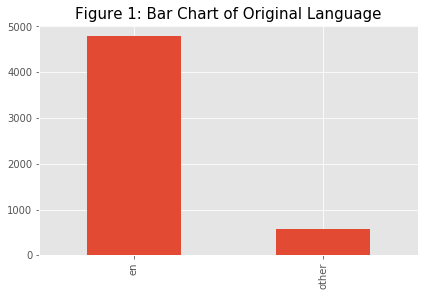

In [23]:
ax = movieData['original_language'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Original Language', fontsize=15)
plt.show();

We will now create a boxplot and a histogram for the `revenue` target variable. 

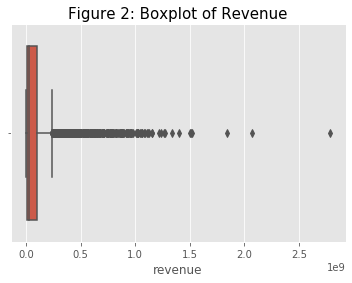

In [24]:
sns.boxplot(movieData['revenue']).set_title('Figure 2: Boxplot of Revenue', fontsize=15)
plt.show();

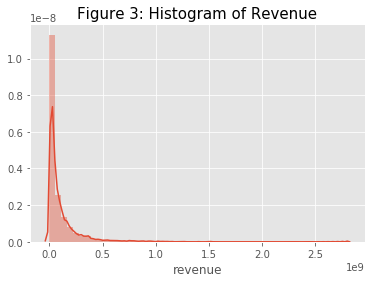

In [25]:
sns.distplot(movieData['revenue'], kde=True).set_title('Figure 3: Histogram of Revenue', fontsize=15)
plt.show();

According to Figure 3 above, the `revenue` target variable is heavily right-skewed.

### <font color=blue>Multivariate Visualisation</font>

Let us create scatterplots comparing the independent numerical features with our `revenue` response variable.

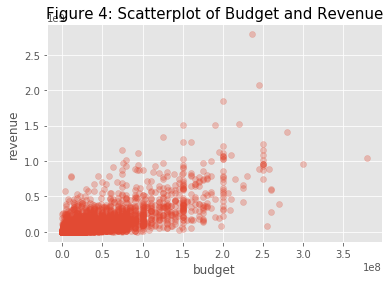

In [26]:
plt.scatter(movieData['budget'], movieData['revenue'], alpha=0.3)
plt.title('Figure 4: Scatterplot of Budget and Revenue', fontsize=15)
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show();

According to Figure 4 above, there seems to be a positive correlation between `revenue` and `budget`.

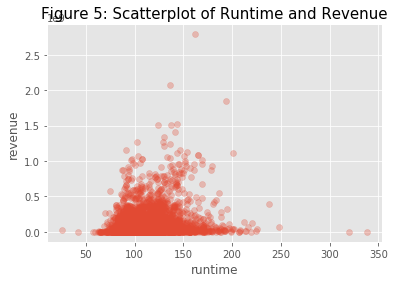

In [27]:
plt.scatter(movieData['runtime'], movieData['revenue'], alpha=0.3)
plt.title('Figure 5: Scatterplot of Runtime and Revenue', fontsize=15)
plt.xlabel('runtime')
plt.ylabel('revenue')
plt.show();

According to Figure 5 above, the distribution of the `revenue` variable appears similar to a normal distribution against the `runtime` variable. 

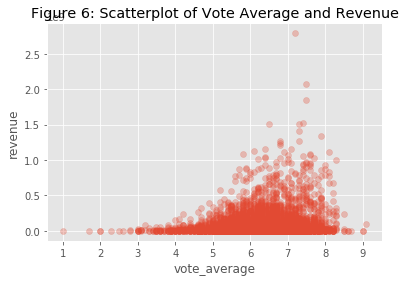

In [28]:
plt.scatter(movieData['vote_average'], movieData['revenue'], alpha=0.3)
plt.title('Figure 6: Scatterplot of Vote Average and Revenue')
plt.xlabel('vote_average')
plt.ylabel('revenue')
plt.show();

Figure 6 above shows that `revenue` is left-skewed against `vote_average`.

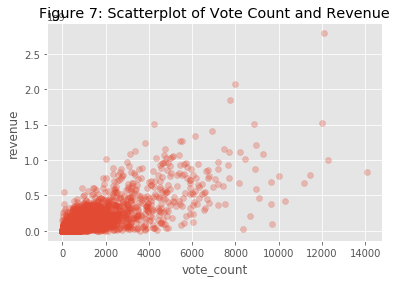

In [29]:
plt.scatter(movieData['vote_count'], movieData['revenue'], alpha=0.3)
plt.title('Figure 7: Scatterplot of Vote Count and Revenue')
plt.xlabel('vote_count')
plt.ylabel('revenue')
plt.show();

According to Figure 7, it seems that there is a postive correlation between `revenue` and `vote_count`.

Let us now make a boxplot to compare our `original_language` categorical feature with `revenue`.

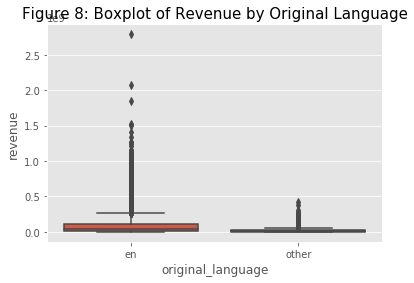

In [30]:
sns.boxplot(movieData['original_language'], movieData['revenue'])
plt.title('Figure 8: Boxplot of Revenue by Original Language', fontsize=15)
#plt.ylim(0.0, 0.5e9)
plt.show();

Let's zoom in on Figure 8 to get a better look at the boxplot. 

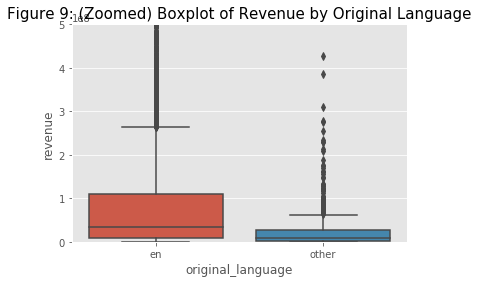

In [31]:
sns.boxplot(movieData['original_language'], movieData['revenue'])
plt.title('Figure 9: (Zoomed) Boxplot of Revenue by Original Language', fontsize=15)
plt.ylim(0.0, 0.5e9)
plt.show();

According to Figure 9 above, the distribution of english movies and non-english movies are very different. The medians of each boxplot are different as well, suggesting that english movies make more money at the box office than non-english movies. 

Let us create and display 3-variable plots using the `original_language` feature.

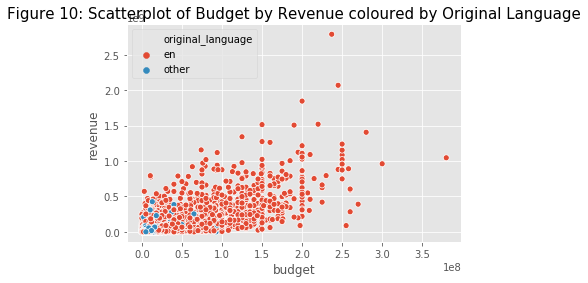

In [32]:
sns.scatterplot(movieData['budget'], movieData['revenue'], hue=movieData['original_language'])
plt.title('Figure 10: Scatterplot of Budget by Revenue coloured by Original Language', fontsize=15);
plt.legend(loc = 'upper left')
plt.show();

Figure 10 shows that non-english movies are not only associated with lower budget films, but with less financially successful films.

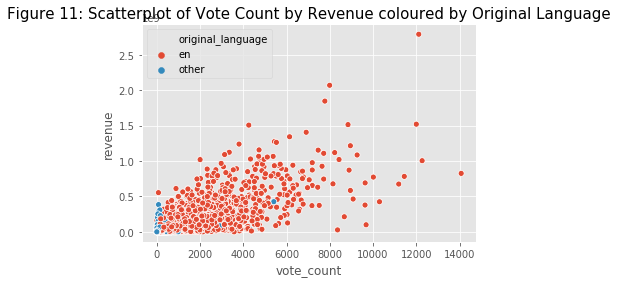

In [33]:
sns.scatterplot(movieData['vote_count'], movieData['revenue'], hue=movieData['original_language'])
plt.title('Figure 11: Scatterplot of Vote Count by Revenue coloured by Original Language', fontsize=15);
plt.legend(loc = 'upper left')
plt.show();

Figure 11 shows that non-english films are associated with the lower range of vote counts, and also confirms in addition to Figure 9, that they are correlated with lower grossing movies.

<a id='StatisticalModellingandPerformanceEvaluation'></a>

## <font color=blue>Statistical Modelling and Performance Evaluation</font>

### <font color=blue>Full Model</font>

We will fit a multiple linear regression model that will be used to predict our `revenue` target variable utilising every variable available in our cleansed dataset below.

In [34]:
movieData.head()

,budget,original_language,revenue,runtime,vote_average,vote_count
0,30000000.0,en,373554033.0,81.0,7.7,5415.0
1,65000000.0,en,262797249.0,104.0,6.9,2413.0
3,16000000.0,en,81452156.0,127.0,6.1,34.0
5,60000000.0,en,187436818.0,170.0,7.7,1886.0
8,35000000.0,en,64350171.0,106.0,5.5,174.0


We will construct a regression formula using all of the independent variables.

In [35]:
formula_string_independent_variables = ' + '.join(movieData.drop(columns='revenue').columns)
formula_string = 'revenue ~ ' + formula_string_independent_variables
print('formula_string:', formula_string)

formula_string: revenue ~ budget + original_language + runtime + vote_average + vote_count


The only categorical variable in the regression formula is `original_language`, which needs to be encoded using 'one-hot-encoding'.

In [36]:
movieData_encoded = pd.get_dummies(movieData, drop_first=False)
movieData_encoded.head()

,budget,revenue,runtime,vote_average,vote_count,original_language_en,original_language_other
0,30000000.0,373554033.0,81.0,7.7,5415.0,1,0
1,65000000.0,262797249.0,104.0,6.9,2413.0,1,0
3,16000000.0,81452156.0,127.0,6.1,34.0,1,0
5,60000000.0,187436818.0,170.0,7.7,1886.0,1,0
8,35000000.0,64350171.0,106.0,5.5,174.0,1,0


Now let us modify the original regression formula using the encoded variables.

In [37]:
formula_string_independent_variables_encoded = ' + '.join(movieData_encoded.drop(columns='revenue').columns)
formula_string_encoded = 'revenue ~ ' + formula_string_independent_variables_encoded
print('formula_string_encoded:', formula_string_encoded)

formula_string_encoded: revenue ~ budget + runtime + vote_average + vote_count + original_language_en + original_language_other


We will now fit an ordinary least squares model to the new encoded data.

In [38]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=movieData_encoded)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2649.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:57:09   Log-Likelihood:            -1.0577e+05
No. Observations:                5362   AIC:                         2.116e+05
Df Residuals:                    5356   BIC:                         2.116e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8

Let us visualise the actual `revenue` values vs. the predicted `revenue` values. 

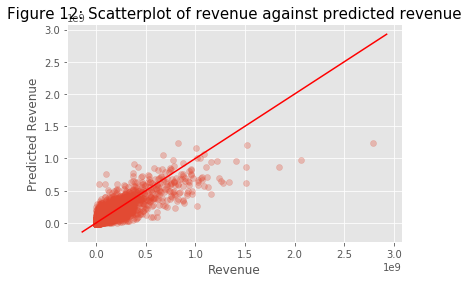

In [39]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax=axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
plt.scatter(movieData_encoded['revenue'], model_full_fitted.fittedvalues, alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Revenue');
plt.ylabel('Predicted Revenue');
plt.title('Figure 12: Scatterplot of revenue against predicted revenue', fontsize=15);
plt.show();

This full regression model contains an adjusted R-squared value of 0.712, which shows that approximately 71% of the variance in the dataset is explained by this model. Figure 12 above shows that this model never portrays a prediction above a revenue of 1.25 billion dollars, even though the largest revenue value is above 2.5 billion dollars. Looking at the p-values from the OLS regression results, we see that `budget`, `vote_count`, and `original_language_en` variables, in the presence of the other variables, are statistically significant at the 5% level, and the other features are not. Let us now do diagnostic checks for this full regression model.

### <font color=blue>Diagnostic Checks for Full Model</font>

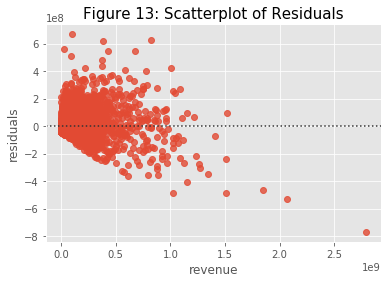

In [40]:
sns.residplot(x=movieData_encoded['revenue'], y=model_full_fitted.fittedvalues);
plt.ylabel('residuals')
plt.title('Figure 13: Scatterplot of Residuals', fontsize=15)
plt.show();

Figure 13 shows that a large proportion of the residuals appear to be mostly random, however it looks like the residuals are mostly centred a little above 0.

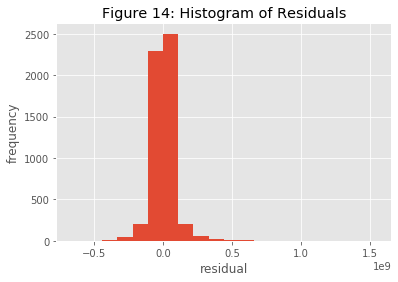

In [41]:
residuals = movieData_encoded['revenue'] - model_full_fitted.fittedvalues
plt.hist(residuals, bins=20);
plt.xlabel('residual')
plt.ylabel('frequency')
plt.title('Figure 14: Histogram of Residuals')
plt.show();

From Figure 14 above, it seems that the residuals are somewhat normally distributed, and a little bit right-skewed.

### <font color=blue>Backwards Variable Selection</font>

We will now manually execute a backwards variable selection process utilising p-values.

The largest p-value for the current regression model is 0.828, and is associated with the `runtime` variable.

In [42]:
formula_string_indep_vars= ' + '.join(movieData_encoded.drop(columns=['revenue', 'runtime']).columns)
formula_string = 'revenue ~ ' + formula_string_indep_vars
print('formula_string:', formula_string)

model_reduced = sm.formula.ols(formula = formula_string, data = movieData_encoded)
model_reduced_fitted = model_reduced.fit()
print(model_reduced_fitted.summary())

formula_string: revenue ~ budget + vote_average + vote_count + original_language_en + original_language_other
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     3311.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:57:10   Log-Likelihood:            -1.0577e+05
No. Observations:                5362   AIC:                         2.116e+05
Df Residuals:                    5357   BIC:                         2.116e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

The next variable to remove will be `original_language_other`, as it has the current largest p-value of 0.836. 

In [43]:
formula_string_indep_vars = ' + '.join(movieData_encoded.drop(columns=['revenue', 'runtime', 'original_language_other']).columns)
formula_string = 'revenue ~ ' + formula_string_indep_vars
print('formula_string:', formula_string)

model_reduced = sm.formula.ols(formula = formula_string, data = movieData_encoded)
model_reduced_fitted = model_reduced.fit()
print(model_reduced_fitted.summary())

formula_string: revenue ~ budget + vote_average + vote_count + original_language_en
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     3311.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:57:10   Log-Likelihood:            -1.0577e+05
No. Observations:                5362   AIC:                         2.116e+05
Df Residuals:                    5357   BIC:                         2.116e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [44]:
formula_string_indep_vars = ' + '.join(movieData_encoded.drop(columns=['revenue', 'runtime', 'original_language_other', 'vote_average']).columns)
formula_string = 'revenue ~ ' + formula_string_indep_vars
print('formula_string:', formula_string)

model_reduced = sm.formula.ols(formula = formula_string , data = movieData_encoded)
model_reduced_fitted = model_reduced.fit()
print(model_reduced_fitted.summary())

formula_string: revenue ~ budget + vote_count + original_language_en
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     4416.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:57:10   Log-Likelihood:            -1.0577e+05
No. Observations:                5362   AIC:                         2.116e+05
Df Residuals:                    5358   BIC:                         2.116e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

The backwards variable selection process is now completed and the following updated regression formula is displayed below.

In [45]:
print(formula_string)

revenue ~ budget + vote_count + original_language_en


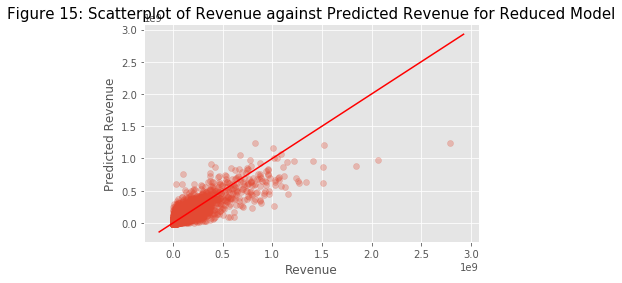

In [46]:
plt.scatter(movieData['revenue'], model_reduced_fitted.fittedvalues, alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Revenue');
plt.ylabel('Predicted Revenue');
plt.title('Figure 15: Scatterplot of Revenue against Predicted Revenue for Reduced Model', fontsize=15);
plt.show(); 

The reduced model still has an adjusted R-squared value of 0.712, however, this reduced model has 3 less variables. All the current p-values are significant at the 5% level. However, this reduced regression model in Figure 15 still cannot predict revenue above 1.25 billion dollars. We are now going to do diagnostic checks on this current reduced model.

### <font color=blue>Diagnostic Checks for Reduced Model</font>

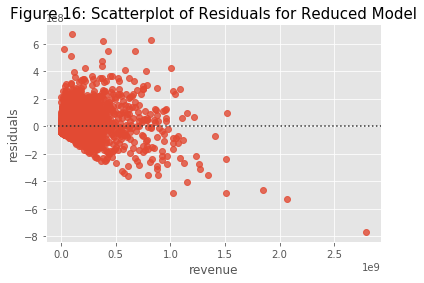

In [47]:
sns.residplot(x=movieData_encoded['revenue'],  y=model_reduced_fitted.fittedvalues);
plt.ylabel('residuals')
plt.title('Figure 16: Scatterplot of Residuals for Reduced Model', fontsize=15)
plt.show();

Figure 16 appears similar to Figure 13 in that a large proportion of the residuals appear mostly random, but it still looks like the residuals are mostly centred a little above 0.

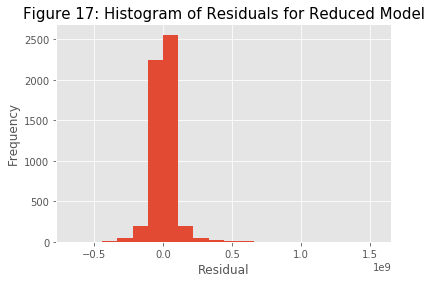

In [48]:
residuals = movieData_encoded['revenue'] - model_reduced_fitted.fittedvalues
plt.hist(residuals, bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 17: Histogram of Residuals for Reduced Model', fontsize = 15)
plt.show();

Figure 17 shows that the residuals are still somewhat normally distributed, and still a bit right-skewed.

<a id='Conclusion'></a>

## <font color=blue>Conclusion</font>

We first obtained a full regression model explained by predicted_revenue = -8.787e+06 + 1.7736 X budget + (-1.367e+04) X runtime + 5.67e+05 X vote_average + 6.924e+04 X vote_count + (-1.005e+07) X original_language_en + 1.258e+06 X original_language_other. This model gave an adjusted R-squared value of 71.2%. Utilising a backwards variable selection as our feature selection process, with a cutoff p-value of 0.05, we obtained a reduced regression model with the same adjusted R-squared value, but with 3 fewer variables. Our final regression model has 3 features in total.

When performing diagnostic checks on both the full model and the final reduced regression model, by visualising residuals using scatterplots and histograms, no significant violations of multiple linear regression conditions occurred, which confirms the validity of our resultant statistical model.

Our final reduced linear regression model, explained by predicted_revenue = -5.469e+06 + 1.7689 X budget + 6.941e+04 X vote_count + (-1.128e+07) X original_language_en, contains an adjusted R-squared value of 71.2%, the same as our full model. We would consider this value as relatively high, which shows that the available variables in the cleansed dataset are pretty good predictors of the revenue of a movie in the MovieLens dataset. In order to potentially improve the adjusted R-squared value, we might include interaction terms. In this reduced model, the p-values of the budget and vote_count features are 0, and the p-value of the original_language_en feature is 0.005, all well below the 0.05 cuttoff p-value, which, together with the high adjusted R-squared value for the model, all indicate the high predictive potential of these features when used together.

Our final reduced regression model can predict most of the revenues of movies correctly within +/- 400 million dollars. However, it underestimates the revenue of most movies which earn over 1.25 billion dollars, which relatively is a minority of movies.

## <font color=blue>References</font>

 - Banik, R 2017, _The Movies Dataset_ , Kaggle Inc, data file, viewed 13 October 2017,< https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7 >

## <font color=blue>Bibliography</font>

 - Banik, R 2017, The Movies Dataset , Kaggle Inc, data file, viewed 13 October 2017,< https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7 >
 - Dr. Aksakalli, V n.d., _Predicting Age in Census Data_ , statistics report, n.p., viewed 14 October 2019, < https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/ > 